# Data Pre-Processing - Face Detection & Alignment

### Detecting Faces -> Alligning Faces -> Clustering Faces

### Face Detection

- http://dlib.net/face_detector.py.html
- https://www.pyimagesearch.com/2018/02/26/face-detection-with-opencv-and-deep-learning/

In [32]:
import os
import shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Condfidence: 98.79%
(399, 44, 633, 331)
287 234
Total faces found: 1

[399.94163513  44.87143457 633.00037384 331.80091381]


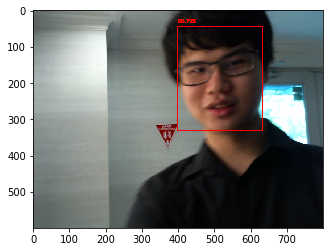

In [35]:
prototextPath = "module/deploy.prototxt.txt"
caffeModel = "module/res10_300x300_ssd_iter_140000.caffemodel"

net = cv2.dnn.readNetFromCaffe(prototextPath,caffeModel)

face_found = 0
boxes = []

image = cv2.imread('alvin1.jpg')
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(h,w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image,(300,300)),1.0,(300,300),(104.0, 177.0, 123.0))
net.setInput(blob)
detections = net.forward()
    
for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    
    if confidence > 0.8:
        print('Condfidence: {:.2f}%'.format(confidence*100))
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        print((startX, startY, endX, endY))
        
        face = image[startY:endY, startX:endX]
        (fH, fW) = face.shape[:2]
        print(fH, fW)

        
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
        cv2.putText(image, text, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
            
        face_found += 1
        boxes.append(box)
               
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            
print('Total faces found: {}'.format(face_found))
for box in boxes:
    print('')
    print(box)

In [13]:
detections

array([[[[0.        , 1.        , 0.9878905 , ..., 0.07478572,
          0.79125047, 0.5530015 ],
         [0.        , 1.        , 0.12301514, ..., 4.005475  ,
          0.82587034, 4.9912786 ],
         [0.        , 1.        , 0.11657442, ..., 4.0144315 ,
          4.844497  , 4.9866433 ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)

### Face Alignment

- http://dlib.net/face_alignment.py.html
- https://www.pyimagesearch.com/2017/05/22/face-alignment-with-opencv-and-python/

In [14]:
from imutils.face_utils import FaceAligner
from imutils.face_utils import rect_to_bb
import argparse
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
import os

In [15]:
shape_predictor = 'module/shape_predictor_68_face_landmarks.dat'

In [16]:
# face detector model
detector = dlib.get_frontal_face_detector()
# facial landmark detector
predictor = dlib.shape_predictor(shape_predictor)
# face aligner
fa = FaceAligner(predictor, desiredFaceWidth=256)

In [27]:
# ??FaceAligner

In [17]:
image = cv2.imread('be_00091.png')
image = imutils.resize(image, width=800)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 2)

for rect in rects:
    (x, y, w, h) = rect_to_bb(rect)
    faceAligned = fa.align(image, gray, rect)
    
plt.imshow(cv2.cvtColor(faceAligned, cv2.COLOR_BGR2RGB));

In [23]:
for idx, rect in enumerate(rects):
    
    path_to_save = 'double'
    if path_to_save not in os.listdir():
        os.makedirs(path_to_save)
    
    (x, y, w, h) = rect_to_bb(rect)
    faceAligned = fa.align(image, gray, rect)
    cv2.imwrite(os.path.join('double', '{}.jpg'.format(idx)),faceAligned)